In [2]:
# !pip install --q transformers
!pip install --q datasets
!pip install --q transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.4 MB/s eta 0:00:00


In [3]:
#@ LOADING THE REQUIRED LIBRARIES AND DEPENDENCIES
from datasets import list_datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#@ EXPLORING DATASETS
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the hub")
print(f"The fist 10 datasets from HuggingFace Hub are: {all_datasets[:10]}")

<ipython-input-4-46818ed7f397>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There are 71567 datasets currently available on the hub
The fist 10 datasets from HuggingFace Hub are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [5]:
#@ LOADING EMOTION DATASETS
emotions = load_dataset("emotion")
emotions

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_data = emotions["train"]
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_data[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
print(train_data.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [9]:
print(train_data[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [10]:
train_data["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [11]:
#@ Converting HF Dataset into DataFrame
emotions.set_format(type="pandas")
data = emotions["train"][:]
data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
#@ Decoding label names
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

data["label_name"] = data["label"].apply(label_int2str)
data.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


**Looking at the class distribution**

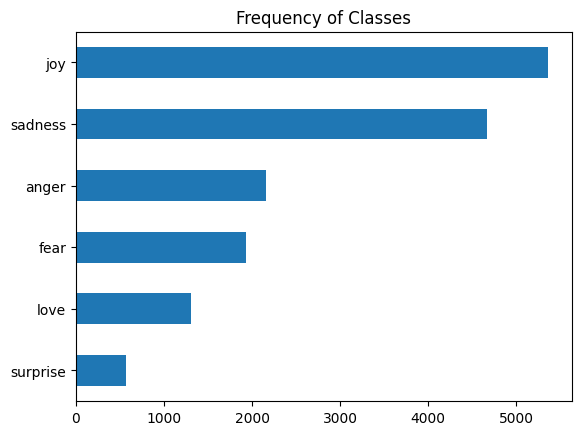

In [13]:
data["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

**Observations:**

We can see that our dataset is heavily imbalanced, the joy and
sadness classes appear frequently, whereas love and surprise are about
5-10 times rarer. There are several ways to deal with imbalanced data,
including:
- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.

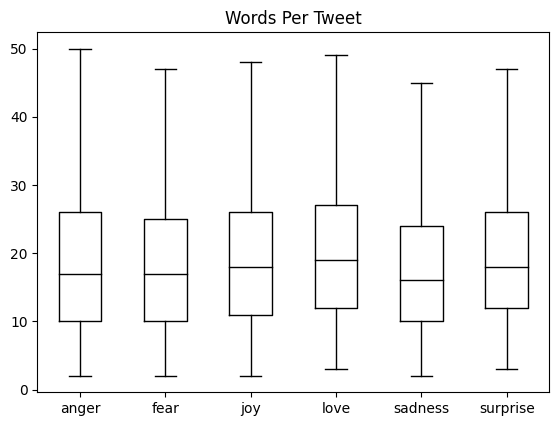

In [14]:
#@ Inspecting tweet lengths per emotions
data["Words Per Tweet"] = data["text"].str.split().apply(len)
data.boxplot("Words Per Tweet",
             by="label_name",
             grid=False,
             showfliers=False,
             color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

**Observation:**

- Most tweets are around 15 words long and the longest tweets are well below DistilBERT's maximum context size.

In [15]:
#@ Reset back to orginal data format
emotions.reset_format()

## From Text to Tokens

- **Tokenization** is the step of breaking down a string into atomic units used in the model.

- Sometimes, our model expects each character to be converted to an integer, a process sometimes called numericalization.

In [16]:
#@ CHARACTER TOKENIZATION
text = "Tokenizing text is a core task of NLP"
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [17]:
#@ NUMERICALIZATION
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'f': 8, 'g': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17, 'z': 18}


In [18]:
#@ Transform tokenized text to list of integers
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


In [19]:
categorical_data = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"],
     "Label ID": [0,1,1]}
)
categorical_data

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,1


In [20]:
pd.get_dummies(categorical_data["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [21]:
#@ Creating OHE using PyTorch
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([37, 19])

In [22]:
#@ Character level tokenization
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 4
One-hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


**Word Tokenization**

- Instead of splitting the text into characters, we can split it into words and map each word to an integer

In [23]:
#@ WORD TOKENIZATION
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']


**Subword Tokenization**

- The basic idea behind subword tokenization is to combine the best aspects of character and word tokenization.

-  It splits rare words into smaller units to allow the model to deal with complex words and misspellings and it keeps frequent words as unique entities so that the length of inputs are kept to a manageable size.

In [24]:
from transformers import AutoTokenizer
from transformers import DistilBertTokenizer

model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_checkpoint)

In [25]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [26]:
#@ Transforming back into tokens
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


In [27]:
#@ Converting tokens back to string
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp [SEP]


In [28]:
print("The vocab size in the text:",tokenizer.vocab_size)                     # Inspecting the vocabulary size
print("The model's maximum context size:",tokenizer.model_max_length)               # Corresponding model's maximum context size

The vocab size in the text: 30522
The model's maximum context size: 512


## Tokenizing the Whole Dataset

- Here, we'll use `map()` method for our DatasetDict object

In [29]:
#@ Processing function to tokenize our example
def tokenize(batch):
    return tokenizer(batch["text"],
                     padding = True,
                     truncation = True)

print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


- `padding = True` will pad with zeros to the size of longest one in a batch
- `truncation = True` will truncate the text to the model's maximum context size

In [30]:
#@ Implementing the tokenize function all over thte corpus
emotions_encoded = emotions.map(tokenize, batched = True, batch_size = None)
emotions_encoded

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [31]:
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

## Training a Text Classifier

**Using pretrained models**
- The `AutoModel` class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states.

In [32]:
#@ Transformers as feature extractors
import torch
from transformers import AutoModel

model_checkpoint = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_checkpoint).to(device)

In [33]:
#@ Exploring the last hidden states for a single string
text = "this is a text"
inputs = tokenizer(text, return_tensors = "pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [34]:
#@ Placing tensor on same device as model and pass
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2535, -0.1091,  0.0759,  ..., -0.1054,  0.2257,  0.4615],
         [-0.7154, -0.2742, -0.0954,  ..., -0.3597,  0.5174,  0.3450],
         [-0.4100, -0.2195,  0.1850,  ..., -0.0136,  0.1607,  1.0422],
         [-0.2523, -0.0254,  0.2472,  ..., -0.1637,  0.0865,  1.0516],
         [-0.0570, -0.1057,  0.0662,  ...,  0.0584,  0.1034,  0.2971],
         [ 0.9184,  0.1577, -0.4105,  ...,  0.1509, -0.7327, -0.1572]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [35]:
#@ Checking the shape of last hidden state
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [36]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [37]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}           # place model inputs on the GPU
    # Extract the last hidden state
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [38]:
#@ Converting the columns into troch format
emotions_encoded.set_format("torch",
                            columns = ["input_ids", "attention_mask", "label"])

#@ Extracting hidden state accross all splits
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched = True)
print(emotions_hidden["train"].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']


In [39]:
#@ Creating a feature matrix
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])

y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

print(X_train.shape, X_valid.shape)

(16000, 768) (2000, 768)


In [41]:
#@ Visualizing the training set
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)          # Scale features to [0,1] range
mapper = UMAP(n_components = 2, metric = "cosine").fit(X_scaled)

#@ Creating a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns = ["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.370445,6.641315,0
1,-3.092156,5.550167,0
2,5.264332,3.240222,3
3,-2.389936,3.492926,2
4,-3.203712,3.637629,3


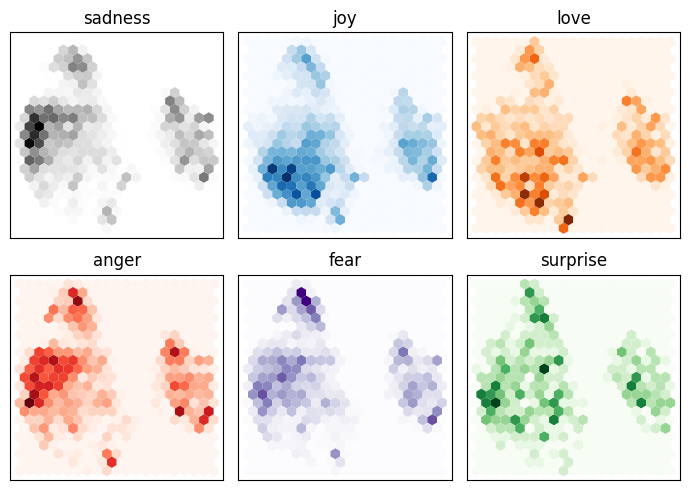

In [42]:
#@ Plotting the density of points for each category
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

- The negative feelings like sadness, anger, and fear all occupy similar regions with slightly varying distributions.

- And joy, love are well separated from negative emotions and share similar space

- Surprise is scattered all over the place

In [43]:
#@ Training a simple classifier
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

- Looking at the accuracy, it might appear that our model is just a bit better than random—but since we are dealing with an unbalanced multiclass dataset, it's actually significantly better.

In [44]:
#@ Building classifier using heuristics approach - choosing the majority class
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

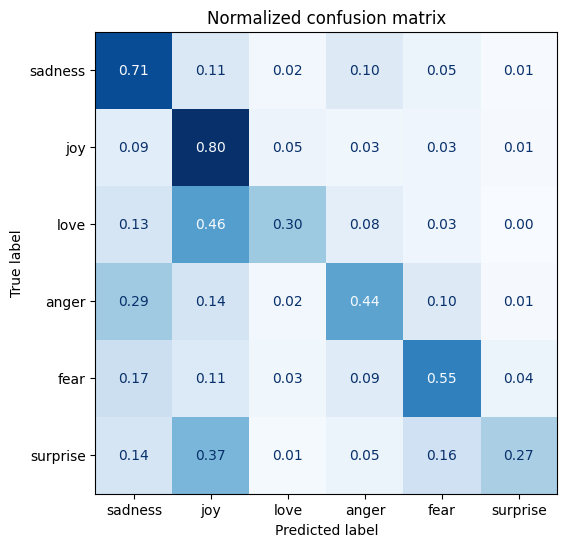

In [45]:
#@ Inspecting performance of model by looking confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [46]:
#@ Fine Tuning Transfomers
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels = num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
#@ Defining the performance metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = "weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [48]:
#@ Training the Model
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_checkpoint}-finetuned-emotion"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs = 2,
                                  learning_rate = 2e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  weight_decay = 0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm = False,
                                  logging_steps = logging_steps,
                                  log_level = "error"
                                  )

In [49]:
from transformers import Trainer

trainer = Trainer(model = model,
                  args = training_args,
                  compute_metrics = compute_metrics,
                  train_dataset = emotions_encoded["train"],
                  eval_dataset = emotions_encoded["validation"],
                  tokenizer = tokenizer
                  )
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.849700,0.345980,0.900000,0.897221
2,0.260800,0.227149,0.924500,0.924385


In [50]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [51]:
preds_output.metrics

{'test_loss': 0.2271488606929779,
 'test_accuracy': 0.9245,
 'test_f1': 0.9243853757904692,
 'test_runtime': 4.0649,
 'test_samples_per_second': 492.011,
 'test_steps_per_second': 7.872}

In [53]:
print(np.argmax(preds_output.predictions, axis=1))

[0 0 2 ... 1 1 1]


In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [54]:
#@ Error Analysis
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [55]:
#@ COMPUTING LOSS:
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)
emotions_encoded.set_format("pandas")                                           # Changing data format
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)                        # Converting integers into strings
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)    # Converting integers into strings
df_test.sort_values("loss", ascending=False).head()

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

,text,label,predicted_label,loss
1801,i feel that he was being overshadowed by the s...,love,sadness,5.814020
1509,i guess this is a memoir so it feels like that...,joy,fear,5.289629
1950,i as representative of everything thats wrong ...,surprise,sadness,5.274758
1963,i called myself pro life and voted for perry w...,joy,sadness,5.206469
882,i feel badly about reneging on my commitment t...,love,sadness,5.114810


In [56]:
df_test.sort_values("loss", ascending=True).head()                             # Inspection.

,text,label,predicted_label,loss
566,i did things that i always wondered about and ...,sadness,sadness,0.018916
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.019020
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.019147
69,i have no extra money im worried all of the ti...,sadness,sadness,0.019320
1310,i feel like an ungrateful asshole,sadness,sadness,0.019321
